Import Data and Required Packages :

In [1]:
# Basic Import:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Modelling libraries:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge, Lasso
# from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

# hyper-parameter tuning

from sklearn.model_selection import RandomizedSearchCV

Import CSV data as pandas dataframe

In [3]:
df = pd.read_csv(r"C:\Users\sneha\Documents\mlprojects\notebook\data\stud.csv")

In [4]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


Preparing X and Y variable

Predicting math_score : Target variable : math_score : Dependent feature : Y

In [5]:
X = df.drop(columns=["math_score"],axis=1)

In [6]:
X.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [7]:
y = df["math_score"]

In [8]:
y.head()

0    72
1    69
2    90
3    47
4    76
Name: math_score, dtype: int64

Create Column Transformer with 3 types of transformers or pipelines

In [9]:
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

In [10]:
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer

In [11]:
numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer([
    ("OneHotEncoder", oh_transformer, cat_features ),
    ("StandardScaler", numeric_transformer, num_features)
])

In [12]:
X = preprocessor.fit_transform(X)

In [13]:
X.shape

(1000, 19)

In [14]:
# split the dataset into train test split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size =0.2, random_state=42)

In [15]:
X_train.shape

(800, 19)

In [16]:
y_train.shape

(800,)

Create an evaluate function to give all metrics after model training:

In [17]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error, r2_score

In [18]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true,predicted)
    mse = mean_squared_error(true,predicted)
    rmse = root_mean_squared_error(true,predicted)
    r2_square = r2_score(true,predicted)

    return mae,mse,rmse,r2_square

In [19]:
models = {
    "Linear Regression" : LinearRegression(),
    "Lasso" : Lasso(),
    "Ridge" : Ridge(),
    "K-Neighbors Regressor" : KNeighborsRegressor(),
    "DecisionTree Regressor" : DecisionTreeRegressor(),
    "RandomForest Regressor" : RandomForestRegressor(),
    "XGB Regressor" : XGBRegressor(),
    "AdaBoost Regressor" : AdaBoostRegressor()
}

In [20]:
model_list = []
r2_list = []

for i in range (len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train,y_train)


    # make predictions

    y_train_predict = model.predict(X_train)
    y_test_predict = model.predict(X_test)

    # Evaluate model using evaluation function:

    model_train_mae , model_train_mse, model_train_rmse, model_train_r2_square = evaluate_model(y_train,y_train_predict)
    model_test_mae , model_test_mse, model_test_rmse, model_test_r2_square = evaluate_model(y_test,y_test_predict)


    # Print all 

    print(list(models.keys())[i].upper())
    print("="*35)
    print("\n")
    model_list.append(list(models.keys())[i])

    print ("MODEL PERFORMANCE FOR TRAINING SET")
    print("\n")
    print("- Mean Absolute Error : {:.4f}".format(model_train_mae))
    print("- Mean Squared Error : {:.4f}".format(model_train_mse))
    print("- Root Mean Squared Error : {:.4f}".format(model_train_rmse))
    print("- r2 Square : {:.4f}".format(model_train_r2_square))

    print("-----------------------------------------------------------------")

    print ("MODEL PERFORMANCE FOR TESTING SET")
    print("\n")
    print("- Mean Absolute Error : {:.4f}".format(model_test_mae))
    print("- Mean Squared Error : {:.4f}".format(model_test_mse))
    print("- Root Mean Squared Error : {:.4f}".format(model_test_rmse))
    print("- r2 Square : {:.4f}".format(model_test_r2_square))


    # append r2 score of test dataset in r2_list
    r2_list.append(model_test_r2_square)

    print("="*35)
    print("\n")


LINEAR REGRESSION


MODEL PERFORMANCE FOR TRAINING SET


- Mean Absolute Error : 4.2667
- Mean Squared Error : 28.3349
- Root Mean Squared Error : 5.3231
- r2 Square : 0.8743
-----------------------------------------------------------------
MODEL PERFORMANCE FOR TESTING SET


- Mean Absolute Error : 4.2148
- Mean Squared Error : 29.0952
- Root Mean Squared Error : 5.3940
- r2 Square : 0.8804


LASSO


MODEL PERFORMANCE FOR TRAINING SET


- Mean Absolute Error : 5.2063
- Mean Squared Error : 43.4784
- Root Mean Squared Error : 6.5938
- r2 Square : 0.8071
-----------------------------------------------------------------
MODEL PERFORMANCE FOR TESTING SET


- Mean Absolute Error : 5.1579
- Mean Squared Error : 42.5064
- Root Mean Squared Error : 6.5197
- r2 Square : 0.8253


RIDGE


MODEL PERFORMANCE FOR TRAINING SET


- Mean Absolute Error : 4.2650
- Mean Squared Error : 28.3378
- Root Mean Squared Error : 5.3233
- r2 Square : 0.8743
-------------------------------------------------------

In [21]:
# Results in a Dataframe 

pd.DataFrame(list(zip(model_list,r2_list)), 
             columns = ["Model Name", "R2 Score"],
             ).sort_values(by=["R2 Score"],ascending=False)

,Model Name,R2 Score
2,Ridge,0.880593
0,Linear Regression,0.880433
7,AdaBoost Regressor,0.856095
5,RandomForest Regressor,0.850359
6,XGB Regressor,0.827797
1,Lasso,0.825320
3,K-Neighbors Regressor,0.783813
4,DecisionTree Regressor,0.745498


insights : so there is not much difference by Ridge and Linear Regression  . so we can take Linear Regression 

# Linear Regression

In [22]:
best_model = LinearRegression(fit_intercept=True)
best_model = best_model.fit(X_train,y_train)

best_model_y_test_prediction = best_model.predict(X_test)
best_model_evaluation_score = r2_score(y_test,best_model_y_test_prediction)*100

print("Accuracy of the best model is %.2f" %best_model_evaluation_score)

Accuracy of the best model is 88.04


Plots of Linear Regression Model

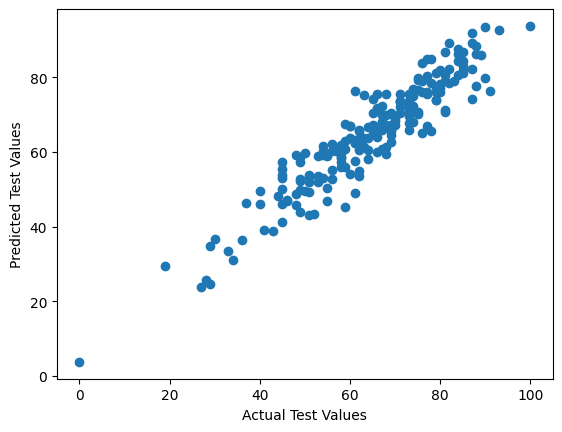

In [23]:
# plot y_predict and y_test 

plt.scatter(x=y_test, y=best_model_y_test_prediction)
plt.xlabel("Actual Test Values");
plt.ylabel("Predicted Test Values");

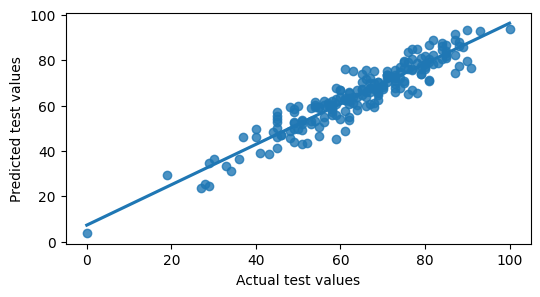

In [27]:
plt.figure(figsize=(6,3))
sns.regplot(x=y_test,
            y=best_model_y_test_prediction,
            ci=None);
plt.xlabel("Actual test values");
plt.ylabel("Predicted test values");

show the difference between actual and predicted test values 

In [25]:
error_df = pd.DataFrame({
    "Actual test Value" : y_test,
    "Predicted test Value" : best_model_y_test_prediction,
    "Difference/ Error" : y_test - best_model_y_test_prediction
})


In [26]:
error_df.head()

,Actual test Value,Predicted test Value,Difference/ Error
521,91,76.387970,14.612030
737,53,58.885970,-5.885970
740,80,76.990265,3.009735
660,74,76.851804,-2.851804
411,84,87.627378,-3.627378
